# Desafío 1: Determinantes del ingreso

# 1. Preliminares

☑ Hito 1: Preliminares y Aspectos Computacionales.<br>
☑ Hito 2: Descripción.<br>
☐ Hito 3: Modelación descriptiva.<br>
☐ Hito 4: Modelación predictiva.<br>


## Descripción del problema

Usted trabaja para un  organismo no  gubernamental que está interesado en  las  dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema,enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el  Desarrollo. Le  encomiendan el  desarrollo de  un  modelo predictivo  sobre la <b>probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales</b>, en basea una serie de atributos sociodemográficos.

Para desarrollar este problema se utilizará un modelo de regresión logistica por medio de machine learning, el cual nos permitirá determinar probabilidad de ocurrencia, esto sumado a que nuestra variable dependiente cuenta con la particularidad de ser binaria y el resto de variables independientes cumplen la condición de ser continuos y/o categoricos.

Resulta que para los casos donde nuestro vector objetivo presenta atributos discretos como en este caso las métricasc (MSE, R2) fallan en  capturar el  fenómeno, es por esto que utilizaremos las siguientes metricas: <br><br>
<b>Precision:</b><br>
Mide la fracción de predicciones correctas entre las etiquetas positivas. <br>

<b>Recall:</b><br>
Mide la fraccion de verdaderos positivos predichos por el modelo. <br>

<b>F1-score:</b> <br>

<b>accuracy:</b> <br>

<b>AUC:</b> <br>

<b>confusion matrix:</b> <br>



# 2. Aspectos computacionales

Para el desarrollo de este modelo predictivo se utilizarán las siguientes librerias, las cuales se detallan a continuación:

`pandas`, `numpy`: manejo de datos (df) y transformación de los mismos.

`matplotlib`, `seaborn`: para generar visualizaciones de datos

`sklearn`: libreria de _machine learning_ para aplicar el modelo smf.logit

`IPython.display` , `tabulate`: Generar prints con mejor aspecto

`missingno`: permite graficar las variables perdidas en el dataframe

`statsmodels.formula.api`: 

`re`: Replace library

`IPython.display` , `tabulate`: Generar prints con mejor aspecto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.formula.api as smf
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
plt.rcParams['figure.figsize'] = 10, 8
from IPython.display import HTML, display
import tabulate
import warnings
warnings.filterwarnings("ignore")

Se importa el dataset y se visualizan las primeras columnas:

In [2]:
df = pd.read_csv('income-db.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 3. Descripción

In [3]:
#significancia estadisitca  = 0.005
#Variables a borrar = sbp, adiposity, obesity, alcohol
df = df.drop(['fnlwgt'], axis=1)

Reemplaza el guión medio por guión bajo en el nombre de las columnas.

In [4]:
df = df.rename(columns=lambda x: re.sub('-','_',x))

se realiza la transformación de la variable `?` a `NA` para su posterior tratamiento y se realiza una primera inspección de la data

In [5]:
df = df.replace(to_replace ="?",value = np.nan)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age                48842 non-null int64
workclass          46043 non-null object
education          48842 non-null object
educational_num    48842 non-null int64
marital_status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital_gain       48842 non-null int64
capital_loss       48842 non-null int64
hours_per_week     48842 non-null int64
native_country     47985 non-null object
income             48842 non-null object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


analisis de las variables perdidas, existen 3 variables que presentan dichas variables:
workclass, occupation, native_country

In [7]:
#Distribución de valores nulos por columna
df.isnull().sum(axis = 0)

age                   0
workclass          2799
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

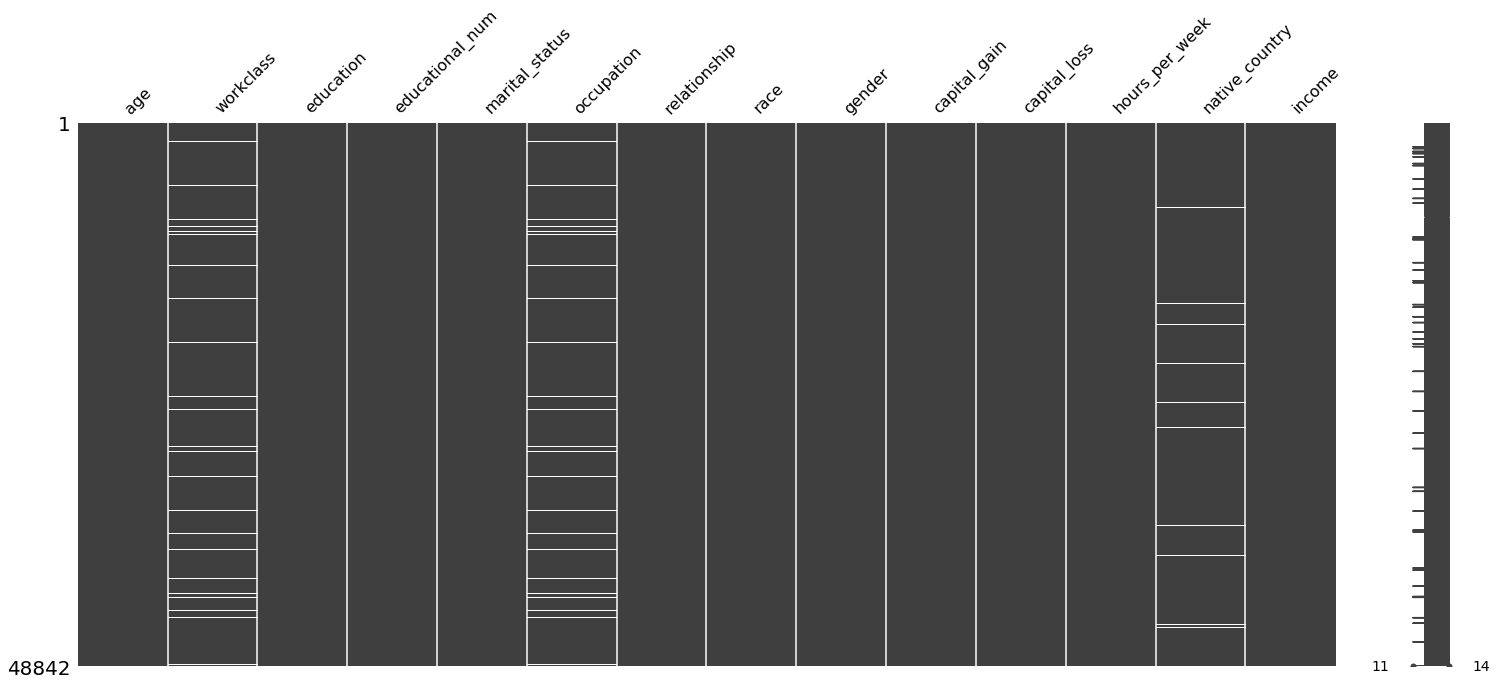

In [8]:
msno.matrix(df)

se eliminan los valores perdidos

In [9]:
#drop na
df = df.dropna()

In [10]:
# analizar luego del dropna()
df.isnull().sum(axis = 0)

age                0
workclass          0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

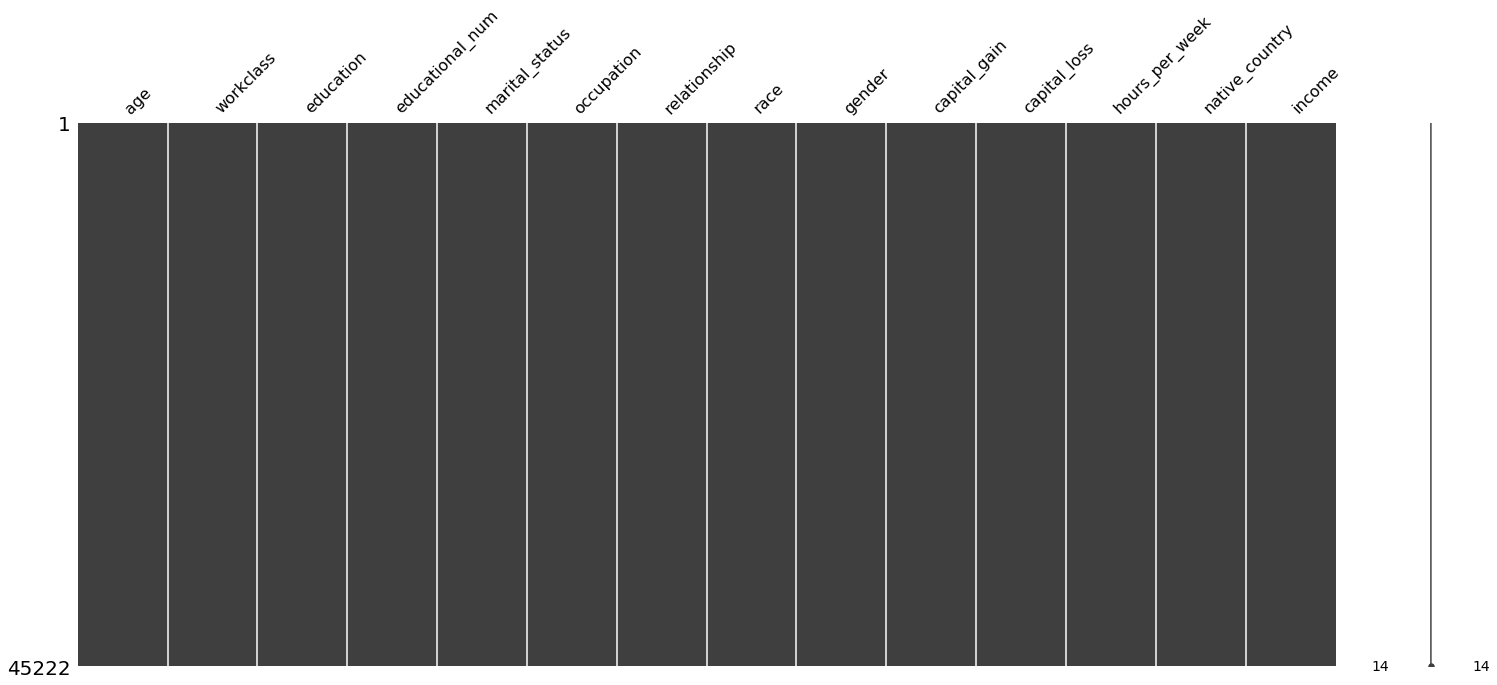

In [11]:
msno.matrix(df)

## Transformaciones
<b>occupation <b>
debe recodificarse como collars siguiendo una nomenclatura similar a:<br>
white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales,Tech-support.<br>
blue-collar$\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving,Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.<br>
others $\leftarrow$ Other-service, Armed-Forces<br>

In [12]:
#valores originales de ocupación
df['occupation'].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

In [13]:
# copia la columna con el nombre indicado
df['collars'] = df['occupation']


In [14]:
df['collars'] = df['collars'].replace(to_replace =['Prof-specialty','Exec-managerial',
                                                         'Adm-clerical','Sales',
                                                         'Tech-support'],value = 'white-collar')

In [15]:
df['collars'] = df['collars'].replace(to_replace =['Craft-repair','Machine-op-inspct',
                                                         'Transport-moving','Handlers-cleaners',
                                                         'Farming-fishing','Protective-serv',
                                                         'Priv-house-serv'],value = 'blue-collar')


In [16]:
df['collars'] = df['collars'].replace(to_replace =['Other-service', 
                                                      'Armed-Forces'],value = 'others')


In [17]:
#valores transformados de ocupación
df['collars'].value_counts()

white-collar    24360
blue-collar     16040
others           4822
Name: collars, dtype: int64

<b>workclass <b>
debe recodificarse como workclass_recod  siguiendo una  nomenclatura similar a :<br>
federal-gov$\leftarrow$ Federal-gov.<br>
state-level-gov$\leftarrow$ State-gov, Local-gov.<br>
self-employed$\leftarrow$ Self-emp-inc,Self-emp-not-inc <br>
unemployed$\leftarrow$ Never-worked, Without-pay<br>

In [18]:
#valores originales de ocupación
df['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [19]:
# copia la columna con el nombre indicado
df['workclass_recod'] = df['workclass']


In [20]:
df['workclass_recod'] = df['workclass_recod'].replace(to_replace =['Federal-gov'],value='federal-gov')

In [21]:
df['workclass_recod'] = df['workclass_recod'].replace(to_replace =['State-gov',
                                                             'Local-gov'],value='state-level-gov')

In [22]:
df['workclass_recod'] = df['workclass_recod'].replace(to_replace =['Self-emp-inc',
                                                             'Self-emp-not-inc'],value='self-employed')

In [23]:
df['workclass_recod'] = df['workclass_recod'].replace(to_replace =['Never-worked',
                                                             'Without-pay'],value='unemployed')

In [ ]:
#valores transformados de ocupación
df['workclass_recod'].value_counts()

Private            33307
self-employed       5442
state-level-gov     5046
federal-gov         1406
unemployed            21
Name: workclass_recod, dtype: int64

<b>education debe recodificarse como educ_recod siguiendo una nomenclatura similar a :<br>
preschool$\leftarrow$ Preschool<br>
elementary-school$\leftarrow$ 1st-4th, 5th-6th<br>
high-school$\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad<br>
college$\leftarrow$ Assoc-voc, Assoc-acdm, Some-college<br>
university$\leftarrow$ Bachelors, Masters, Prof-school, Doctorate<br>

In [ ]:
#valores originales de ocupación
df['education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

In [ ]:
# copia la columna con el nombre indicado
df['educ_recod'] = df['education']


In [ ]:
df['educ_recod'] = df['educ_recod'].replace(to_replace =['Preschool'],value = 'preschool')

In [ ]:
df['educ_recod'] = df['educ_recod'].replace(to_replace =['1st-4th', '5th-6th'],value = 'elementary-school')

In [ ]:
df['educ_recod'] = df['educ_recod'].replace(to_replace =['7th-8th', 
                                                        '9th', 
                                                        '10th',
                                                        '11th', 
                                                        '12th',
                                                        'HS-grad'],value = 'high-school')

In [ ]:
df['educ_recod'] = df['educ_recod'].replace(to_replace =['Assoc-voc', 
                                                        'Assoc-acdm', 
                                                        'Some-college'],value = 'college')

In [ ]:
df['educ_recod'] = df['educ_recod'].replace(to_replace =['Bachelors', 
                                                        'Masters', 
                                                        'Prof-school', 
                                                        'Doctorate'],value = 'university')

In [ ]:
#valores recodificados de ocupación
df['educ_recod'].value_counts()

high-school          19701
college              13365
university           11413
elementary-school      671
preschool               72
Name: educ_recod, dtype: int64

<b>marital-status debe recodificarse como civstatus  siguiendo una  nomenclatura similar a :<br>
married$\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse<br>
divorced$\leftarrow$ Divorced<br>
separated$\leftarrow$ Separated<br>
widowed$\leftarrow$ Widowed<br>

In [ ]:
#valores originales de estado conyugal
df['marital_status'].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital_status, dtype: int64

In [ ]:
# copia la columna con el nombre indicado
df['civstatus'] = df['marital_status']

In [ ]:
df['civstatus'] = df['marital_status'].replace(to_replace =['Married-civ-spouse', 
                                                            'Married-spouse-absent', 
                                                            'Married-AF-spouse'],value = 'married')

In [ ]:
df['civstatus'] = df['civstatus'].replace(to_replace =['Divorced'],value = 'divorced')

In [ ]:
df['civstatus'] = df['civstatus'].replace(to_replace =['Separated'],value = 'separated')

In [ ]:
df['civstatus'] = df['civstatus'].replace(to_replace =['Widowed'],value = 'widowed')

In [ ]:
#valores transformados de estado conyugal
df['civstatus'].value_counts()

married          21639
Never-married    14598
divorced          6297
separated         1411
widowed           1277
Name: civstatus, dtype: int64

<B>native-country debe recodificarse como region donde cada país debe asignarse auno de los 5 continente

In [ ]:
# copia la columna con el nombre indicado
df['region'] = df['native_country']

In [ ]:
#valores originales de region
df['region'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [ ]:
df['region'] = df['region'].replace(to_replace =['United-States',
                                                 'Peru',
                                                 'Guatemala',
                                                 'Mexico',
                                                 'El-Salvador', 
                                                 'Puerto-Rico',
                                                 'Columbia',
                                                 'Nicaragua',
                                                 'Honduras',
                                                 'Jamaica',
                                                 'Ecuador',
                                                 'Trinadad&Tobago',
                                                 'Cuba',
                                                 'Canada',
                                                 'Haiti',
                                                 'Outlying-US(Guam-USVI-etc)',
                                                 'Dominican-Republic'],value = 'america')

In [ ]:
df['region'] = df['region'].replace(to_replace =['Ireland', 'Germany',
                                                 'Poland','England',
                                                 'Italy','Portugal',
                                                 'Scotland', 'Yugoslavia',
                                                 'Hungary','Greece',
                                                 'France',
                                                 'Holand-Netherlands'],value = 'europa')

In [ ]:
df['region'] = df['region'].replace(to_replace =['Philippines','Thailand',
                                                 'India','Laos','Taiwan',
                                                 'China','Iran','Hong',
                                                 'Cambodia','Vietnam',
                                                 'Japan'],value = 'asia')

In [ ]:
#valores transformados de region
df['region'].value_counts()

america    43453
asia         930
europa       738
South        101
Name: region, dtype: int64

In [ ]:
#binarización de income
df['income'] = np.where(df['income'] == '>50K', 1, 0)

In [ ]:
#valores transformados de region
df['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [ ]:
df = df.drop(columns=['occupation', 'workclass', 'education', 'marital_status', 'native_country'])

In [ ]:
df.head()

,age,educational_num,relationship,race,gender,capital_gain,capital_loss,hours_per_week,income,collars,workclass_recod,educ_recod,civstatus,region
0,25,7,Own-child,Black,Male,0,0,40,0,blue-collar,Private,high-school,Never-married,america
1,38,9,Husband,White,Male,0,0,50,0,blue-collar,Private,high-school,married,america
2,28,12,Husband,White,Male,0,0,40,1,blue-collar,state-level-gov,college,married,america
3,44,10,Husband,Black,Male,7688,0,40,1,blue-collar,Private,college,married,america
5,34,6,Not-in-family,White,Male,0,0,30,0,others,Private,high-school,Never-married,america


# 4. Modelación descriptiva

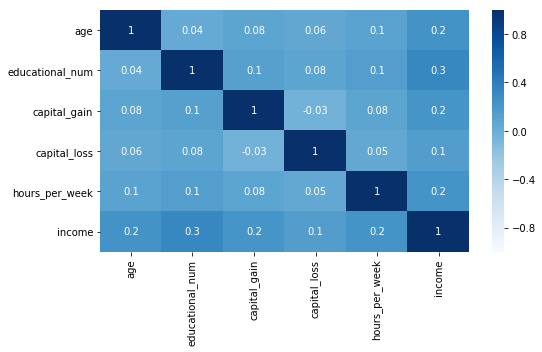

In [ ]:
dfcorr = df.corr().dropna()
plt.rcParams['figure.figsize'] = 8, 5
ax = sns.heatmap(dfcorr, annot=True, cmap='Blues', vmin=-1, vmax=1, fmt='.1g')
plt.tight_layout()

In [ ]:
def transformaciones(df):
    """For a given dataframe, binarize rows 0-1 (2 category).
    
    Parameters
    ----------
    dataframe : df
        dataframe to transform
    
    Returns
    -------
    print : 'done'
        when ends
    """
    columnas = df.columns.to_list()
    for columna in columnas:
        if df[columna].dtypes == 'object':
            valores = df[columna].value_counts().index.tolist()
            valores.pop(0)
            for valor in valores:
                df["bin_"+columna+"_"+valor] = np.where(df[columna] == valor, 1, 0)

In [ ]:
transformaciones(df)

In [ ]:
df = df.drop(columns=['relationship','race','gender','collars','workclass_recod','educ_recod','civstatus','region'])

In [ ]:
# Implemente un modelo con la siguiente forma
df = df.rename(columns=lambda x: re.sub('-','_',x))
columnas = df.columns.to_list()
tmpcolumns = 'income ~'
for columna in columnas:
    if columna != 'income':
         tmpcolumns += ' + '+ columna
tmpcolumns

'income ~ + age + educational_num + capital_gain + capital_loss + hours_per_week + bin_relationship_Not_in_family + bin_relationship_Own_child + bin_relationship_Unmarried + bin_relationship_Wife + bin_relationship_Other_relative + bin_race_Black + bin_race_Asian_Pac_Islander + bin_race_Amer_Indian_Eskimo + bin_race_Other + bin_gender_Female + bin_collars_blue_collar + bin_collars_others + bin_workclass_recod_self_employed + bin_workclass_recod_state_level_gov + bin_workclass_recod_federal_gov + bin_workclass_recod_unemployed + bin_educ_recod_college + bin_educ_recod_university + bin_educ_recod_elementary_school + bin_educ_recod_preschool + bin_civstatus_Never_married + bin_civstatus_divorced + bin_civstatus_separated + bin_civstatus_widowed + bin_region_asia + bin_region_europa + bin_region_South'

In [ ]:
modelo1=smf.logit(tmpcolumns, data=df).fit()
modelo1.summary()

Optimization terminated successfully.
         Current function value: 0.331857
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45189
Method:                           MLE   Df Model:                           32
Date:                Sat, 02 Nov 2019   Pseudo R-squ.:                  0.4073
Time:                        14:54:25   Log-Likelihood:                -15007.
converged:                       True   LL-Null:                       -25322.
                                        LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.4042      0.171    -31.544      0.000      -5.740      -5.068
age                                     0.0249      0.001     18.408      0.000       0.022       0.028
educational_num                         0.2757      0.016     17.191      0.000       0.244       0.307
capital_gain                            0.0003    8.6e-06     36.912      0.000       0.000       0.000
capital_loss                            0.0007   3.07e-05     21.320      0.000       0.001       0.001
hours_per_week                          0.0295      0.001     22.396      0.000       0.027       0.032
bin_relationship_Not_in_family         -0.9591      0.134     -7.160      0.000      -1.222      -0.697
bin_relationship_Own_child             -1.9455      0.167    -11.680      0.000      -2.272      -1.619
bin_relationship_Unmarried             -1.1914      0.151     -7.916      0.000      -1.486      -0.896
bin_relationship_Wife                   1.0609      0.084     12.618      0.000       0.896       1.226
bin_relationship_Other_relative        -1.4202      0.187     -7.580      0.000      -1.787      -1.053
bin_race_Black                         -0.2040      0.062     -3.268      0.001      -0.326      -0.082
bin_race_Asian_Pac_Islander             0.2850      0.135      2.116      0.034       0.021       0.549
bin_race_Amer_Indian_Eskimo            -0.5528      0.179     -3.083      0.002      -0.904      -0.201
bin_race_Other                         -0.2690      0.206     -1.306      0.191      -0.673       0.135
bin_gender_Female                      -0.7891      0.064    -12.287      0.000      -0.915      -0.663
bin_collars_blue_collar                -0.6041      0.035    -17.086      0.000      -0.673      -0.535
bin_collars_others                     -1.3365      0.086    -15.578      0.000      -1.505      -1.168
bin_workclass_recod_self_employed      -0.3441      0.042     -8.150      0.000      -0.427      -0.261
bin_workclass_recod_state_level_gov    -0.0765      0.046     -1.668      0.095      -0.166       0.013
bin_workclass_recod_federal_gov         0.4389      0.075      5.856      0.000       0.292       0.586
bin_workclass_recod_unemployed         -1.1046      0.801     -1.379      0.168      -2.674       0.465
bin_educ_recod_college                  0.0659      0.047      1.410      0.159      -0.026       0.157
bin_educ_recod_university               0.1551      0.086      1.803      0.071      -0.013       0.324
bin_educ_recod_elementary_school        0.2309      0.223      1.035      0.301      -0.207       0.668
bin_educ_recod_preschool               -3.9004      4.058     -0.961      0.336     -11.853       4.053
bin_civstatus_Never_married            -1.2872      0.137     -9.414      0.000      -1.555      -1.019
bin_civstatus_divorced                 -0.8030      0.138     -5.801      0.000      -1.074      -0.532
bin_civstatus_sep

In [ ]:
#significancia estadisitca  = 0.005
#Variables a borrar = sbp, adiposity, obesity, alcohol
df = df.drop(['bin_race_Other','bin_workclass_recod_state_level_gov','bin_workclass_recod_unemployed',
                'bin_educ_recod_college','bin_educ_recod_university','bin_educ_recod_elementary_school',
                'bin_educ_recod_preschool','bin_region_europa'], axis=1)

In [ ]:
columnas = df.columns.to_list()
tmpcolumns = 'income ~'
for columna in columnas:
    if columna != 'income':
         tmpcolumns += ' + '+ columna
tmpcolumns

In [ ]:
modelo2=smf.logit(tmpcolumns, data=df).fit()
modelo2.summary()

def invlogit(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x = df.drop(['income'], axis=1)  # features
y = df['income']  # target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
model = LogisticRegression().fit(x_train, y_train)

In [ ]:
yhat_class = model.predict(x_test)

In [ ]:
yhat_pr = model.predict_proba(x_test)[:, 1]

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yhat_class))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_class))

In [ ]:
from sklearn.metrics import roc_curve
false_positive, true_positive, thres = roc_curve(y_test, yhat_pr)
plt.plot(false_positive, true_positive, color="red")
plt.plot([0,1], ls='-')
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, yhat_pr)

hay casi un 40% sobre el mecanismo de clasificación aleatoria

In [ ]:
rich = np.array([40.0, 16, 'Husband', 'White', 'Male' , 1000, 0, 40, 'white', 'private'   , 'university', 'married', 'europe']).reshape(1,-1) 

In [ ]:
richdf = pd.DataFrame(rich,index=rich[:,0])

In [ ]:
richdf = transformaciones(richdf)

In [ ]:
richdf

In [ ]:
predictrich = model.predict_proba(richdf)[:, 1]

In [ ]:
poor = np.array([20.0,  9, 'Wife'   , 'Black', 'Woman',   100, 0,  0, 'blue' , 'unemployed', 'preschool' , 'married', 'africa']).reshape(1,-1)  # reshape is for a single feature/sample

In [ ]:
poordf = pd.DataFrame(poor,index=poor[:,0])